In [40]:
import main
import pandas as pd
import networkx as nx
from EmergencyUnit import EmergencyUnit
import matplotlib.pyplot as plt

{}

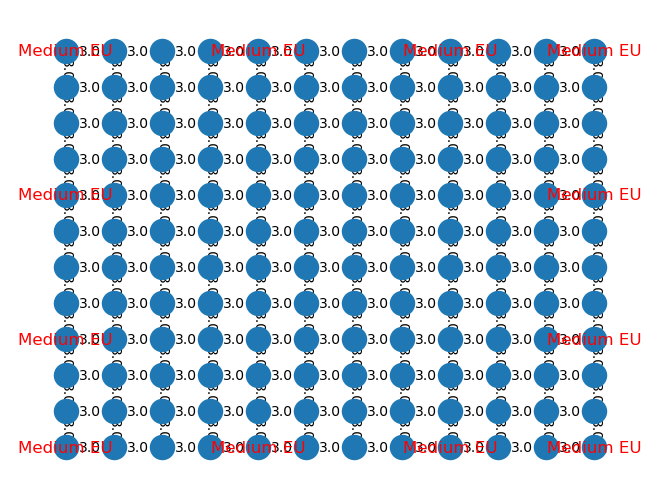

In [24]:
city = main.configure_city_file('corner_medium_ps.txt')
units = EmergencyUnit.response_buildings
small_unit_locs = [unit.location for unit in units if unit.available_capacity==3]
medium_unit_locs = [unit.location for unit in units if unit.available_capacity==5]
large_unit_locs = [unit.location for unit in units if unit.available_capacity==7]
small_emergency_unit_labels = dict()
medium_emergency_unit_labels = dict()
large_emergency_unit_labels = dict()
pos=dict()
node_coordinates=list(city.city_graph.nodes)
width = city.width
height = city.height
dim = city.zone_dimension
for i in range(len(node_coordinates)):
    pos[node_coordinates[i]]=(node_coordinates[i][1], (height*dim-1)-node_coordinates[i][0])
    if node_coordinates[i] in small_unit_locs:
        small_emergency_unit_labels[node_coordinates[i]] = 'Small EU'
    elif node_coordinates[i] in medium_unit_locs:
        medium_emergency_unit_labels[node_coordinates[i]] = 'Medium EU'
    elif node_coordinates[i] in large_unit_locs:
        large_emergency_unit_labels[node_coordinates[i]] = 'Large EU'
traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
nx.draw(city.city_graph, pos)
nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
nx.draw_networkx_labels(city.city_graph, pos, small_emergency_unit_labels, font_size=12, font_color='r')
nx.draw_networkx_labels(city.city_graph, pos, medium_emergency_unit_labels, font_size=12, font_color='r')
nx.draw_networkx_labels(city.city_graph, pos, large_emergency_unit_labels, font_size=12, font_color='r')

In [25]:
resp_times, successful_perc, emergencies, plotting_emergency_dict = main.simulate(city)
# traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
# nx.draw(city.city_graph, pos)
# nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
# nx.draw_networkx_labels(city.city_graph, pos, emergency_unit_labels, font_size=10, font_color='r')

100%|██████████| 100/100 [01:12<00:00,  1.39it/s]


In [ ]:
df1 = pd.DataFrame({'Average Response Time': resp_times}, index = [_ for _ in range(1, 101)])
plot1 = df1.plot(title = 'Covergence of Average Response Time of Emergencies')
plot1.set(xlabel='Number of Simulation Runs', ylabel='Average Response Time (mins)')
# plot1.show()
df2 = pd.DataFrame({'Percentage of Successfully Responded Emergencies': successful_perc}, index = [_ for _ in range(1, 101)])
plot2 = df2.plot(title = 'Covergence of Percentage of Successfully Responded Emergencies')
plot2.set(xlabel='Number of Simulation Runs', ylabel='Average Percentage of Successfully Responded Emergencies')
# plot2.show()

In [ ]:
print("Average Response Time: {} mins".format(round(resp_times[-1], 2)))
print("Average Percentage of Successfully Responded Emergencies: {} %".format(round(successful_perc[-1], 2)))

In [34]:
node_coordinates=list(city.city_graph.nodes)
node_identifier = [{} for key in plotting_emergency_dict]
color_map= [{} for key in plotting_emergency_dict]
edges_to_draw = [[] for key in plotting_emergency_dict]
counter = 0
units_to_plot = [unit.location for unit in units]
for emergency in plotting_emergency_dict:
    units_to_show = plotting_emergency_dict[emergency]
    for i in range(len(node_coordinates)):
        if node_coordinates[i] == emergency:
            color_map[counter][node_coordinates[i]] = "red"
            node_identifier[counter][node_coordinates[i]] = "E"
        elif node_coordinates[i] in units_to_plot:
            color_map[counter][node_coordinates[i]] = "green"
            node_identifier[counter][node_coordinates[i]] = "EU"
        else:
            color_map[counter][node_coordinates[i]] = "blue"
    for unit in units_to_show:
        path = nx.shortest_path(city.city_graph, source=emergency, target=unit)
        path_edges = list(zip(path, path[1:]))
        for p in path_edges:
            edges_to_draw[counter].append(p)
    counter += 1
#colors = [ color_map.get(node) for node in city.city_graph.nodes]

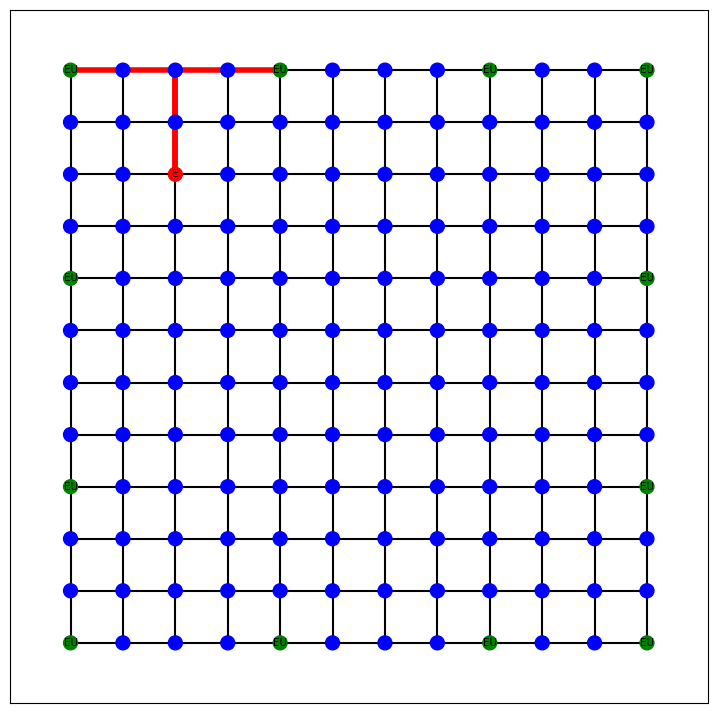

In [41]:
obs = 0
colors = [ color_map[obs].get(node) for node in city.city_graph.nodes]
plt.figure(1, figsize = (9,9))
nx.draw_networkx_nodes(city.city_graph, pos, node_color = colors, node_size = 100)
nx.draw_networkx_edges(city.city_graph,pos,edge_color='black',width=1.5)
nx.draw_networkx_labels(city.city_graph, pos, node_identifier[obs], font_size=7.5, font_color='black')
nx.draw_networkx_edges(city.city_graph,pos,edgelist=edges_to_draw[obs],edge_color='r',width=4)
plt.show()

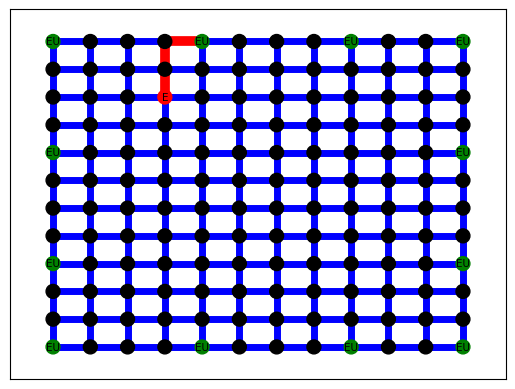

In [30]:
obs = 1
colors = [ color_map[obs].get(node) for node in city.city_graph.nodes]
nx.draw_networkx_nodes(city.city_graph, pos, node_color = colors, node_size=100)
nx.draw_networkx_edges(city.city_graph,pos,edge_color='b',width=5)
nx.draw_networkx_labels(city.city_graph, pos, node_identifier[obs], font_size=7.5, font_color='black')
nx.draw_networkx_edges(city.city_graph,pos,edgelist=edges_to_draw[obs],edge_color='r',width=7)

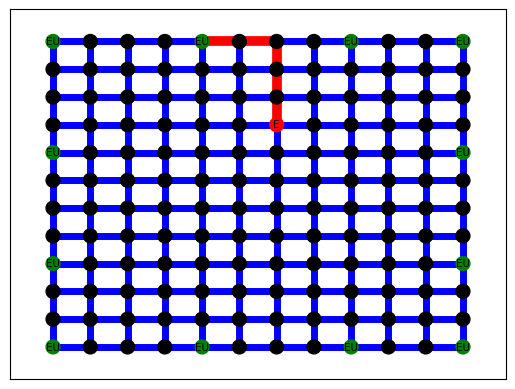

In [31]:
obs = 2
colors = [ color_map[obs].get(node) for node in city.city_graph.nodes]
nx.draw_networkx_nodes(city.city_graph, pos, node_color = colors, node_size=100)
nx.draw_networkx_edges(city.city_graph,pos,edge_color='b',width=5)
nx.draw_networkx_labels(city.city_graph, pos, node_identifier[obs], font_size=7.5, font_color='black')
nx.draw_networkx_edges(city.city_graph,pos,edgelist=edges_to_draw[obs],edge_color='r',width=7)